# Microsoft Video Studio Data Analysis
---------

## PROJECT DESCRIPTION ##

**OVERVIEW**

In this project we want to help to assist Microsoft recognizes the trend of major companies producing their own original video content and wants to join in. However, as they lack experience in movie creation, they have established a new movie studio. Your task is to investigate the current performance of different film genres at the box office and translate the results into practical recommendations for the head of Microsoft's movie studio to guide them in content decision.

## BUSINESS UNDERSTANDING ##

**BUSINESS PROBLEM**

Microsoft, inspired by the success of major companies producing original video content, has decided to launch its own movie studio. However, with no prior experience in film production, Microsoft faces a significant challenge in understanding the dynamics of the movie industry. The goal is to explore the current film landscape, specifically focusing on what types of films are achieving the best box office results. By identifying key factors that contribute to a movie's success, Microsoft can make informed decisions about the types of films to produce, ensuring a competitive entry into the market.

**OBJECTIVES**

### Analysis Objectives

1. Research current film trends and analyze box office success of various movie genres.
2. Identify the most profitable and popular movie genres in the market.
3. Develop a list of recommendations for Microsoft's new movie studio based on the research findings.
4. Present a comprehensive report of the research findings and recommendations to the head of the new movie studio.

## DATA UNDERSTANDING ##

**DATA SOURCE**

Data Source: IMDb (Internet Movie Database) dataset
Justification: IMDb is a comprehensive and reliable source for movie data, including ratings, genres, and other relevant information.

**DATASET COLUMN DESCRIPTION**

The Description is based on the columns resulted from merging two tables from the im.db.


**movie_id:** Unique identifier for each movie.

**primary_title:** The main title of the movie.

**original_title:** The original title of the movie in its native language.

**start_year:** The year the movie was released.

**runtime_minutes:** The duration of the movie in minutes.

**genres:** The categories or genres the movie belongs to (e.g., Drama, Comedy).

**averagerating:** The average rating given to the movie by viewers.

**numvotes:** The number of votes the movie has received from viewers.

**IMPORTING LIBRARIES**

In [56]:
#importing necessary libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import sqlite3 

**DATABASE CONNECTION**

In [57]:
conn = sqlite3.Connection("im.db")
cursor = conn.cursor()

**SCHEMA INSPECTION**

In [58]:
#checking the tables that are available in the database
cursor.execute("SELECT name FROM sqlite_master WHERE type='table';")
tables = cursor.fetchall()

for table in tables:
    print(f"\nTable: {table[0]}")
    cursor.execute(f"PRAGMA table_info({table[0]});")
    columns = cursor.fetchall()
    print("Columns:")
    for column in columns:
        print(f" - {column[1]} (Type: {column[2]})")


Table: movie_basics
Columns:
 - movie_id (Type: TEXT)
 - primary_title (Type: TEXT)
 - original_title (Type: TEXT)
 - start_year (Type: INTEGER)
 - runtime_minutes (Type: REAL)
 - genres (Type: TEXT)

Table: directors
Columns:
 - movie_id (Type: TEXT)
 - person_id (Type: TEXT)

Table: known_for
Columns:
 - person_id (Type: TEXT)
 - movie_id (Type: TEXT)

Table: movie_akas
Columns:
 - movie_id (Type: TEXT)
 - ordering (Type: INTEGER)
 - title (Type: TEXT)
 - region (Type: TEXT)
 - language (Type: TEXT)
 - types (Type: TEXT)
 - attributes (Type: TEXT)
 - is_original_title (Type: REAL)

Table: movie_ratings
Columns:
 - movie_id (Type: TEXT)
 - averagerating (Type: REAL)
 - numvotes (Type: INTEGER)

Table: persons
Columns:
 - person_id (Type: TEXT)
 - primary_name (Type: TEXT)
 - birth_year (Type: REAL)
 - death_year (Type: REAL)
 - primary_profession (Type: TEXT)

Table: principals
Columns:
 - movie_id (Type: TEXT)
 - ordering (Type: INTEGER)
 - person_id (Type: TEXT)
 - category (Type: 

From output above, it is evident that the database contains 8 tables that is : movie_basics, directors, known_for, movie_akas, movie_ratings,
persons, principals and writers. We will inspect each table to understand the nature of the data they hold and also to determine which tables we will need for our analysis.

**TABLE INSPECTION AND UNDERSTANDING RELATIONS**

In [59]:
#We use a function to query all the tables first rows. By inspecting these rows we get to better understand our data
def inspect_table(table_name, conn, limit=5):
    query = f"SELECT * FROM {table_name} LIMIT {limit};"
    return pd.read_sql_query(query, conn)

In [60]:
#Calling the function
tables = ["movie_basics", "directors", "known_for", "movie_akas", "movie_ratings", "persons", "principals", "writers"]

for table in tables:
    print(f"Inspecting {table}")
    display(inspect_table(table, conn))

Inspecting movie_basics


,movie_id,primary_title,original_title,start_year,runtime_minutes,genres
0,tt0063540,Sunghursh,Sunghursh,2013,175.0,"Action,Crime,Drama"
1,tt0066787,One Day Before the Rainy Season,Ashad Ka Ek Din,2019,114.0,"Biography,Drama"
2,tt0069049,The Other Side of the Wind,The Other Side of the Wind,2018,122.0,Drama
3,tt0069204,Sabse Bada Sukh,Sabse Bada Sukh,2018,NaN,"Comedy,Drama"
4,tt0100275,The Wandering Soap Opera,La Telenovela Errante,2017,80.0,"Comedy,Drama,Fantasy"


Inspecting directors


,movie_id,person_id
0,tt0285252,nm0899854
1,tt0462036,nm1940585
2,tt0835418,nm0151540
3,tt0835418,nm0151540
4,tt0878654,nm0089502


Inspecting known_for


,person_id,movie_id
0,nm0061671,tt0837562
1,nm0061671,tt2398241
2,nm0061671,tt0844471
3,nm0061671,tt0118553
4,nm0061865,tt0896534


Inspecting movie_akas


,movie_id,ordering,title,region,language,types,attributes,is_original_title
0,tt0369610,10,Джурасик свят,BG,bg,None,None,0.0
1,tt0369610,11,Jurashikku warudo,JP,None,imdbDisplay,None,0.0
2,tt0369610,12,Jurassic World: O Mundo dos Dinossauros,BR,None,imdbDisplay,None,0.0
3,tt0369610,13,O Mundo dos Dinossauros,BR,None,None,short title,0.0
4,tt0369610,14,Jurassic World,FR,None,imdbDisplay,None,0.0


Inspecting movie_ratings


,movie_id,averagerating,numvotes
0,tt10356526,8.3,31
1,tt10384606,8.9,559
2,tt1042974,6.4,20
3,tt1043726,4.2,50352
4,tt1060240,6.5,21


Inspecting persons


,person_id,primary_name,birth_year,death_year,primary_profession
0,nm0061671,Mary Ellen Bauder,None,None,"miscellaneous,production_manager,producer"
1,nm0061865,Joseph Bauer,None,None,"composer,music_department,sound_department"
2,nm0062070,Bruce Baum,None,None,"miscellaneous,actor,writer"
3,nm0062195,Axel Baumann,None,None,"camera_department,cinematographer,art_department"
4,nm0062798,Pete Baxter,None,None,"production_designer,art_department,set_decorator"


Inspecting principals


,movie_id,ordering,person_id,category,job,characters
0,tt0111414,1,nm0246005,actor,None,"[""The Man""]"
1,tt0111414,2,nm0398271,director,None,None
2,tt0111414,3,nm3739909,producer,producer,None
3,tt0323808,10,nm0059247,editor,None,None
4,tt0323808,1,nm3579312,actress,None,"[""Beth Boothby""]"


Inspecting writers


,movie_id,person_id
0,tt0285252,nm0899854
1,tt0438973,nm0175726
2,tt0438973,nm1802864
3,tt0462036,nm1940585
4,tt0835418,nm0310087


**Rationale for selecting the movie_basics and movie_ratings tables:**

After inspecting the available tables in the database, we determined that the movie_basics and movie_ratings tables would be the most relevant for our analysis.
The movie_basics table contains essential information about each movie, such as its unique identifier, title, release year, runtime, and genres. This information is crucial for understanding and categorizing the movies in our analysis.

The movie_ratings table provides valuable insights into the popularity and reception of each movie by including the average rating and the number of votes cast. This information can be used to analyze the critical and audience reception of movies, identify well-received or poorly received titles, and potentially uncover patterns or correlations between movie attributes and their ratings.

While the other tables in the database, such as directors, writers, and principals, contain additional details about the people involved in the movies, we decided to focus our analysis on the movie-level data first. Incorporating information from these additional tables could be explored in future analyses if deemed necessary.

By focusing on the movie_basics and movie_ratings tables, we can effectively analyze the core attributes and reception of the movies without overwhelming our initial analysis with excessive complexity from the additional tables.

**JOINING THE TABLES**

We will join the two tables using inner join so as to have one complete dataset.

In [61]:
#Joining the two tables using inner join on movie_id
movie_df = """ 
            SELECT a.movie_id, a.primary_title, a.original_title, a.start_year, a.runtime_minutes, a.genres,
            b.averagerating, b.numvotes FROM movie_basics a inner join movie_ratings b on b.movie_id = a.movie_id;
                
            """
pd.read_sql_query(movie_df, conn)    

,movie_id,primary_title,original_title,start_year,runtime_minutes,genres,averagerating,numvotes
0,tt0063540,Sunghursh,Sunghursh,2013,175.0,"Action,Crime,Drama",7.0,77
1,tt0066787,One Day Before the Rainy Season,Ashad Ka Ek Din,2019,114.0,"Biography,Drama",7.2,43
2,tt0069049,The Other Side of the Wind,The Other Side of the Wind,2018,122.0,Drama,6.9,4517
3,tt0069204,Sabse Bada Sukh,Sabse Bada Sukh,2018,NaN,"Comedy,Drama",6.1,13
4,tt0100275,The Wandering Soap Opera,La Telenovela Errante,2017,80.0,"Comedy,Drama,Fantasy",6.5,119
...,...,...,...,...,...,...,...,...
73851,tt9913084,Diabolik sono io,Diabolik sono io,2019,75.0,Documentary,6.2,6
73852,tt9914286,Sokagin Çocuklari,Sokagin Çocuklari,2019,98.0,"Drama,Family",8.7,136
73853,tt9914642,Albatross,Albatross,2017,NaN,Documentary,8.5,8
73854,tt9914942,La vida sense la Sara Amat,La vida sense la Sara Amat,2019,NaN,None,6.6,5


**LOADING THE DATA AS A PANDAS DATAFRAME**

In [62]:
# Load the table into pandas DataFrames and closing the database connection.
df = pd.read_sql_query(movie_df, conn) 
conn.close()

## DATA INSPECTION ##

**METHODOLOGY**
1. Checking the shape/size of the dataset
2. Checking for duplicates
3. Checking for missing values
4. Checking for outliers


In [63]:
#Inspecting the shape of the df
print('Shape of the movies dataset is:', df.shape)

Shape of the movies dataset is: (73856, 8)


From the shape above, we see that we have 73,856 rows and 8 columns.

In [64]:
#Inspecting the first few 5 rows.
df.head()

,movie_id,primary_title,original_title,start_year,runtime_minutes,genres,averagerating,numvotes
0,tt0063540,Sunghursh,Sunghursh,2013,175.0,"Action,Crime,Drama",7.0,77
1,tt0066787,One Day Before the Rainy Season,Ashad Ka Ek Din,2019,114.0,"Biography,Drama",7.2,43
2,tt0069049,The Other Side of the Wind,The Other Side of the Wind,2018,122.0,Drama,6.9,4517
3,tt0069204,Sabse Bada Sukh,Sabse Bada Sukh,2018,NaN,"Comedy,Drama",6.1,13
4,tt0100275,The Wandering Soap Opera,La Telenovela Errante,2017,80.0,"Comedy,Drama,Fantasy",6.5,119


In [65]:
#Inspecting the last few rows
df.tail()

,movie_id,primary_title,original_title,start_year,runtime_minutes,genres,averagerating,numvotes
73851,tt9913084,Diabolik sono io,Diabolik sono io,2019,75.0,Documentary,6.2,6
73852,tt9914286,Sokagin Çocuklari,Sokagin Çocuklari,2019,98.0,"Drama,Family",8.7,136
73853,tt9914642,Albatross,Albatross,2017,NaN,Documentary,8.5,8
73854,tt9914942,La vida sense la Sara Amat,La vida sense la Sara Amat,2019,NaN,None,6.6,5
73855,tt9916160,Drømmeland,Drømmeland,2019,72.0,Documentary,6.5,11


From the inspection of the first and last 5 rows, our data is well stractured in the desired tabular format. However, we can already see a column with NaN values that is the runtime_minutes column indicating presence of missing values. We will further check for missing values in all columns.

In [66]:
#Checking for missing values in our dataset
df.isnull().sum()

movie_id              0
primary_title         0
original_title        0
start_year            0
runtime_minutes    7620
genres              804
averagerating         0
numvotes              0
dtype: int64

In [67]:
#Comouting the percentages of mikssing values
missing_percentages = df.isnull().mean() * 100
print(missing_percentages)

movie_id            0.000000
primary_title       0.000000
original_title      0.000000
start_year          0.000000
runtime_minutes    10.317374
genres              1.088605
averagerating       0.000000
numvotes            0.000000
dtype: float64


We see that the runtime_minutes and genres both have missing values with runtime_minutes having 7,620 missing values taking about 10% of the dataset while genres has 804 of missing values constituting about 1% of the total dataset.

In [68]:
#checking for duplicates
df.duplicated().sum()

0

From the results above, it is clear we do not have any duplicated values

In [69]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 73856 entries, 0 to 73855
Data columns (total 8 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   movie_id         73856 non-null  object 
 1   primary_title    73856 non-null  object 
 2   original_title   73856 non-null  object 
 3   start_year       73856 non-null  int64  
 4   runtime_minutes  66236 non-null  float64
 5   genres           73052 non-null  object 
 6   averagerating    73856 non-null  float64
 7   numvotes         73856 non-null  int64  
dtypes: float64(2), int64(2), object(4)
memory usage: 4.5+ MB


We see that majority of our columns do  ot constitute missing values. As for the data types we see that each column is of the desired data type based on the nature of values they have.

In [70]:
#checking the summary statistics of the numerical values
df.describe()

,start_year,runtime_minutes,averagerating,numvotes
count,73856.000000,66236.000000,73856.000000,7.385600e+04
mean,2014.276132,94.654040,6.332729,3.523662e+03
std,2.614807,208.574111,1.474978,3.029402e+04
min,2010.000000,3.000000,1.000000,5.000000e+00
25%,2012.000000,81.000000,5.500000,1.400000e+01
50%,2014.000000,91.000000,6.500000,4.900000e+01
75%,2016.000000,104.000000,7.400000,2.820000e+02
max,2019.000000,51420.000000,10.000000,1.841066e+06


**Analysis of movie duration, ratings, and number of votes.**

The results displayed provide summary statistics for various attributes related to the movies in our dataset.

1. count: This row shows the number of movies for which we have valid data for each attribute. For example, we have runtime_minutes data for 7,385 movies and averageRating data for 6,623 movies.

2. mean: This row displays the average or mean value for each attribute. On average, the movies in our dataset were released in 2014, have a runtime of approximately 95 minutes, an average rating of 6.33, and received around 93,523 votes.

3. std: This row shows the standard deviation, which measures the spread or dispersion of the data from the mean. For instance, the standard deviation of runtime_minutes is 208.57, indicating a relatively large variation in movie durations.

4. min: This row displays the minimum value for each attribute. The earliest release year in our dataset is 2010, the shortest movie runtime is 3 minutes, the lowest average rating is 1.0, and the movie with the fewest votes received only 5 votes.

5. 25%, 50% (median), and 75%: These rows represent the 25th, 50th (median), and 75th percentiles of the data, respectively. For example, 50% of the movies in our dataset have a runtime of 91 minutes or less, and 25% have an average rating of 5.5 or lower.

6. max: This row shows the maximum value for each attribute. The latest release year is 2019, the longest movie runtime is 51,420 minutes (approximately 35 days!), the highest average rating is 10.0, and the most popular movie received over 1.8 million votes.

These summary statistics provide valuable insights into the distribution and range of values for our key movie attributes, which can inform our subsequent analyses and help identify potential outliers or interesting patterns.

In [71]:
#Checking for outliers
import pandas as pd

def detect_outliers(df):
    outliers = {}
    
    for column in df.columns:
        if df[column].dtype in ['int64', 'float64']:  # Only apply to numeric columns
            Q1 = df[column].quantile(0.25)
            Q3 = df[column].quantile(0.75)
            IQR = Q3 - Q1
            lower_bound = Q1 - 1.5 * IQR
            upper_bound = Q3 + 1.5 * IQR

            outliers[column] = df[(df[column] < lower_bound) | (df[column] > upper_bound)][column]
    
    return outliers

In [72]:
outliers_dict = detect_outliers(df)

# Display outliers for each column
for column, outliers in outliers_dict.items():
    print(f"Outliers in column {column}:\n{outliers}\n")

Outliers in column start_year:
Series([], Name: start_year, dtype: int64)

Outliers in column runtime_minutes:
0        175.0
9        180.0
12       160.0
20        44.0
24        45.0
         ...  
73662     45.0
73710    145.0
73721    140.0
73731    140.0
73793     16.0
Name: runtime_minutes, Length: 3588, dtype: float64

Outliers in column averagerating:
16       1.9
321      2.3
431      1.7
513      2.2
608      2.3
        ... 
73722    2.2
73729    1.4
73747    2.1
73778    2.5
73839    2.6
Name: averagerating, Length: 1172, dtype: float64

Outliers in column numvotes:
2         4517
16        8248
27        1053
31       15378
32        2328
         ...  
73388    19632
73427      817
73683     2220
73730     1214
73735      873
Name: numvotes, Length: 11758, dtype: int64



**Summary from the outliers output:**
**start_year:** 

No outliers detected.

**runtime_minutes:** 

Many outliers, indicating a wide range of runtimes, with some movies being much shorter or longer than average.

**averagerating:** 

Several outliers, showing a diverse range of ratings with some movies rated significantly lower or higher than average.

**numvotes:** 

A large number of outliers, reflecting a high variability in the number of votes movies receive.

These results indicate that while some columns (like start_year) have consistent values, others (like runtime_minutes, averagerating, and numvotes) exhibit significant variability, with many values lying outside the typical range. This variability can be important for further analysis and might suggest areas to investigate more closely, such as the factors contributing to extreme runtimes, ratings, or vote counts.

## DATA CLEANING AND PREPROCESSING ##

**METHODOLOGY**
1. Handling missing values: We can either drop of impute our null values
2. Handling outliers: We determine the size of the outliers then decide whether to drop or keep them.

**STEP 1: HANDLING MISSING VALUES**

We will address the missing values in the `runtime_minutes` column by imputing them with the mean values, rather than dropping the rows. For the missing values in the `genre` column, we will remove those rows since they account for only 1% of the dataset and, being a categorical variable, imputation is not a suitable option.

In [73]:
# Replace missing values with the median
df['runtime_minutes'] = df['runtime_minutes'].fillna(df['runtime_minutes'].mean())

In [74]:
#droping the missing values in genre column
df.dropna(subset = ['genres'], inplace = True)

In [75]:
#checking for missing values after imputing and dropping null values
df.isnull().sum()

movie_id           0
primary_title      0
original_title     0
start_year         0
runtime_minutes    0
genres             0
averagerating      0
numvotes           0
dtype: int64

In [76]:
print('Shape after handling missing values:',df.shape)

Shape after handling missing values: (73052, 8)


We now do not have any missing values and our data shape has reduced number of rows from the rows dropped.

**HANDLING OUTLIERS**

We will visualize the numerical columns that is the runtime_minutes, numvotes and averagerating to get a clear picture before we handle the outliers.

In [77]:
# A function to plot columns to visualize outliers
def plot_outlier_boxplots(df, columns):
    """
    Plots boxplots for specified columns to visualize outliers.

    Parameters:
    df (pd.DataFrame): The DataFrame containing the data.
    columns (list): List of column names to plot boxplots for.
    """
    for column in columns:
        if column in df.columns:
            plt.figure(figsize=(10, 6))
            sns.boxplot(x=df[column])
            plt.title(f'Boxplot of {column}')
            plt.xlabel(column)
            plt.show()
        else:
            print(f"Column '{column}' does not exist in the DataFrame")

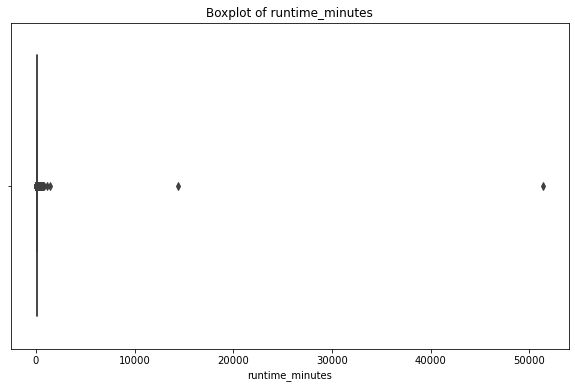

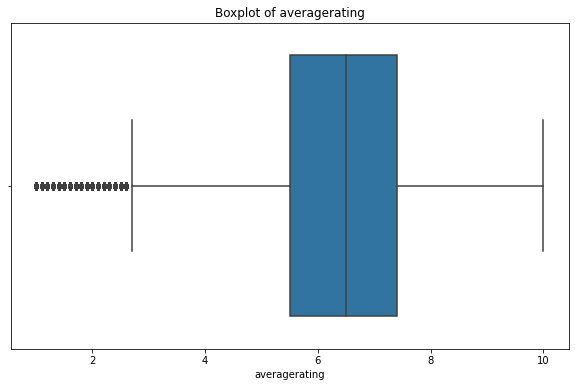

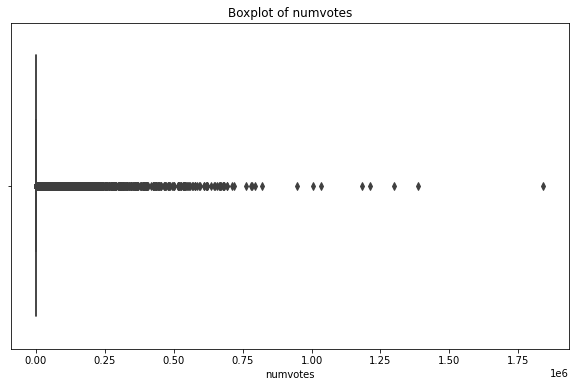

In [78]:
# calling on our function
outlier_columns = ['runtime_minutes', 'averagerating', 'numvotes']
plot_outlier_boxplots(df, outlier_columns)

**Handling Outliers in runtime_minutes, averageRating, and numVotes columns**

When dealing with outliers in our dataset, it's crucial to consider the nature of the data and the potential implications of removing or keeping these extreme values.
Here's our approach for each column:

1. **runtime_minutes:**

    - Outliers in this column could represent extremely long or short movies, which might be valid data points.
    - However, if there are clear data entry errors (e.g., a runtime of 51,420 minutes, which is approximately 35 days), we will remove or correct those outliers.

    - Before removing any outliers, we will investigate the validity of the extreme values to ensure we don't discard genuine cases.

 2. **averageRating:**

   - Outliers in this column are less likely to be data entry errors, as movie ratings are typically constrained to a specific range (e.g., 1-10).
   - Extreme ratings (very high or very low) could represent polarizing movies that received strong positive or negative reactions from viewers.
   - We will retain the outliers in this column, as removing them might lead to a loss of valuable information about the distribution of movie ratings and potentially interesting cases.

 3. **numVotes:**

     - Outliers in this column could represent extremely popular or unpopular movies.
     - Removing outliers with very high or very low vote counts could lead to a skewed representation of movie popularity and might not accurately reflect the true distribution of votes.

    - We will keep the outliers in this column, unless there are clear data quality issues or outliers that are deemed invalid (e.g., a movie with a negative number of votes).

By taking a this approach to handling outliers, we can preserve valuable information while ensuring the integrity of our analysis. We will carefully examine the outliers, remove or correct only those that are clearly erroneous or invalid, and consider alternative approaches (e.g., winsorizing or robust statistical methods) to mitigate the impact of extreme outliers while retaining the overall distribution of the data.

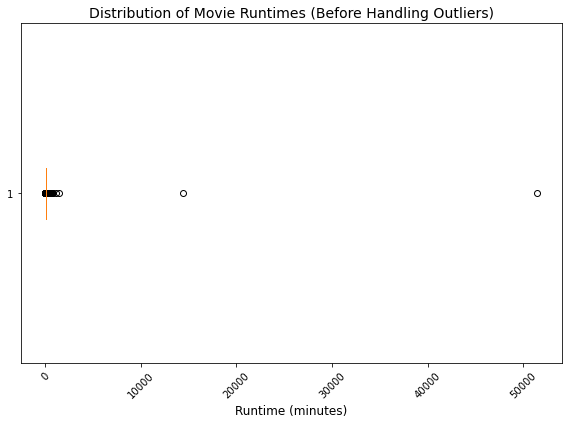

In [79]:
#Runtime before removing outlers

# Create a figure and axis objects
fig, ax = plt.subplots(figsize=(8, 6))

# Plot the original runtime_minutes data
ax.boxplot(df['runtime_minutes'], vert=False)

# Set the title and axis labels
ax.set_title('Distribution of Movie Runtimes (Before Handling Outliers)', fontsize=14)
ax.set_xlabel('Runtime (minutes)', fontsize=12)

# Rotate the x-axis labels for better visibility
plt.xticks(rotation=45)

# Adjust the layout and display the plot
plt.tight_layout()
plt.show()

Removing outliers

In [80]:
# Determine the lower and upper quantile limits for winsorization
lower_limit = df['runtime_minutes'].quantile(0.01)  # 1st percentile
upper_limit = df['runtime_minutes'].quantile(0.99)  # 99th percentile

# Winsorize the runtime_minutes column
df['runtime_minutes_winsorized'] = df['runtime_minutes'].clip(lower_limit, upper_limit)
#df['runtime_minutes'] = df['runtime_minutes'].clip(lower_limit, upper_limit, inplace=True)

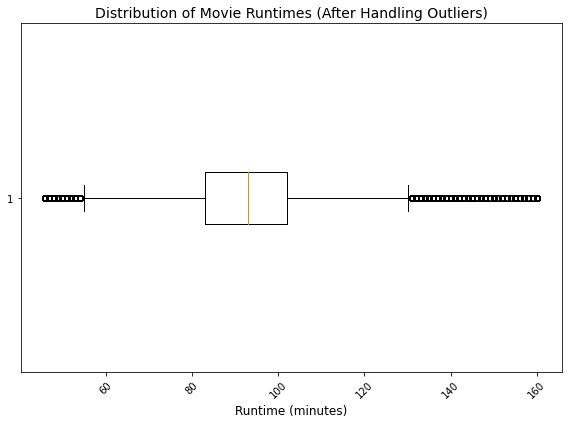

In [83]:
import matplotlib.pyplot as plt

# Create a figure and axis objects
fig, ax = plt.subplots(figsize=(8, 6))

# Plot the winsorized runtime_minutes data
ax.boxplot(df['runtime_minutes_winsorized'], vert=False)

# Set the title and axis labels
ax.set_title('Distribution of Movie Runtimes (After Handling Outliers)', fontsize=14)
ax.set_xlabel('Runtime (minutes)', fontsize=12)

# Rotate the x-axis labels for better visibility
plt.xticks(rotation=45)

# Adjust the layout and display the plot
plt.tight_layout()
plt.show()

In [85]:
df['runtime_minutes_winsorized'].describe()

count    73052.000000
mean        93.555665
std         20.476484
min         46.000000
25%         83.000000
50%         93.000000
75%        102.000000
max        160.000000
Name: runtime_minutes_winsorized, dtype: float64

Now that all the outliers are handled, we can move forward to analysis.

## DATA ANALYSIS ##

**METHODOLOGY**
1. **Feature Engineering:** 

 Creating new features from existing variables

2. **Univariate Analysis:**

Analyzing individual variables
Understanding the distribution of variables

3. **Bivariate Analysis:**

Exploring relationships between pairs of variables
Calculating correlation coefficients
Generating scatter plots and heat maps

4. **Multivariate Analysis:**

Analyzing relationships among multiple variables

**STEP 1: FEATURE ENGINEERING**

In [86]:
#Inspecting the columns we currenly have
df.columns

Index(['movie_id', 'primary_title', 'original_title', 'start_year',
       'runtime_minutes', 'genres', 'averagerating', 'numvotes',
       'runtime_minutes_winsorized'],
      dtype='object')

We will inspect the genre columns, to see how many unique values we have then we can map them to categories for easier analysis.

In [88]:
#Checking for unique values under the genre column
total_unique_genres = df['genres'].nunique()
genres_unique_values = df['genres'].unique()
print('Number of unique genres values',total_unique_genres )
print('All Unique genres',genres_unique_values)


Number of unique genres values 923
All Unique genres ['Action,Crime,Drama' 'Biography,Drama' 'Drama' 'Comedy,Drama'
 'Comedy,Drama,Fantasy' 'Horror,Thriller' 'Adventure,Animation,Comedy'
 'History' 'Documentary' 'Animation,Drama,History' 'Drama,Mystery'
 'Action,Animation,Comedy' 'Crime,Drama' 'Biography,Comedy,Drama'
 'Action,Drama' 'Documentary,History' 'Sci-Fi' 'Comedy' 'Thriller'
 'Adventure,Animation,Sci-Fi' 'Drama,Horror' 'Drama,Mystery,Thriller'
 'Drama,Family' 'Adventure,Comedy,Romance' 'Adventure,Drama,Romance'
 'Comedy,Crime,Drama' 'Biography' 'Horror' 'Adventure,Comedy,Drama'
 'Drama,Sci-Fi,Thriller' 'Action' 'Comedy,Drama,Romance'
 'Action,Adventure,Sci-Fi' 'Comedy,Family' 'Adventure' 'Drama,History,War'
 'Action,Thriller' 'Comedy,Crime' 'Crime,Drama,Thriller'
 'Action,Sci-Fi,Thriller' 'Fantasy' 'Drama,Mystery,Sci-Fi'
 'Biography,Drama,History' 'Action,Comedy,Crime'
 'Action,Adventure,Thriller' 'Horror,Mystery,Thriller'
 'Action,Drama,Family' 'Comedy,Drama,Music' 'Drama,Fan

There are many unique values for te genre column. Since this column plays a key role in our analysis it will be a bit impossible to visualize all those values. We decided to create a new column genre_categories, this will allow us to map all the genres to existing genre categories.

In [89]:
# Define the broader genre categories
genre_categories = {
    'Action': ['Action', 'Adventure'],
    'Comedy': ['Comedy'],
    'Drama': ['Drama'],
    'Romance': ['Romance'],
    'Horror': ['Horror'],
    'Sci-Fi': ['Sci-Fi'],
    'Thriller': ['Thriller'],
    'Documentary': ['Documentary'],
    'Animation': ['Animation'],
    'Family': ['Family'],
    'History': ['History'],
    'War': ['War'],
    'Crime': ['Crime'],
    'Biography': ['Biography'],
    'Music': ['Music'],
    'Western': ['Western'],
    'Mystery': ['Mystery'],
    'Fantasy': ['Fantasy'],
    'Sport': ['Sport'],
    'Musical': ['Musical'],
    'Other': []
}

# Function to map unique genre values to broader categories
def map_genres_to_categories(genres):
    mapped_categories = []
    for genre in genres.split(','):
        for category, keywords in genre_categories.items():
            if genre in keywords:
                mapped_categories.append(category)
                break
        else:
            mapped_categories.append('Other')
    return mapped_categories

# Create a new column with the mapped categories
df['genre_categories'] = df['genres'].apply(map_genres_to_categories)

Checking the categories created and their counts

In [92]:
# Explode the 'genre_categories' column
exploded = df.explode('genre_categories')

# Count unique categories
unique_categories = exploded['genre_categories'].value_counts()

# Print unique categories
print(unique_categories)

Drama          30788
Documentary    17753
Comedy         17290
Action         10805
Thriller        8217
Horror          7674
Romance         6589
Crime           4611
Biography       3809
Family          3412
Mystery         3039
History         2825
Sci-Fi          2206
Fantasy         2126
Music           1968
Animation       1743
Sport           1179
War              853
Musical          721
Other            602
Western          280
Name: genre_categories, dtype: int64


**STEP 2: UNIVARIATE ANALYSIS**

We visualize the genre categories to see the distribution.

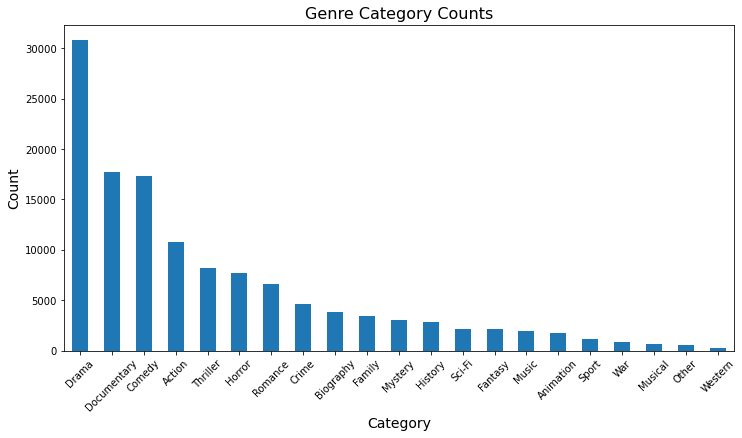

In [93]:


# Get the category counts
category_counts = exploded['genre_categories'].value_counts()

# Create a bar plot
category_counts.plot(kind='bar', figsize=(12, 6))
plt.title('Genre Category Counts', fontsize=16)
plt.xlabel('Category', fontsize=14)
plt.ylabel('Count', fontsize=14)
plt.xticks(rotation=45)
plt.show()

From the plot above, we see movies falling under the drama genre category are more as compared to those with western category.

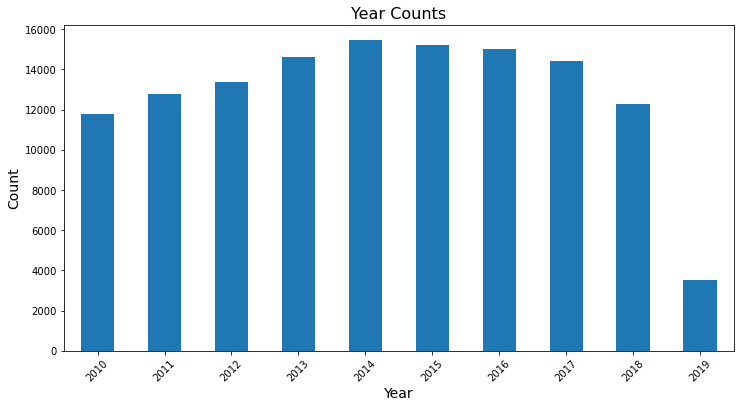

In [103]:
# Get the per year counts and sort by index in descending order
category_counts = exploded['start_year'].value_counts().sort_index(ascending=True)

# Create a bar plot
category_counts.plot(kind='bar', figsize=(12, 6))
plt.title('Year Counts', fontsize=16)
plt.xlabel('Year', fontsize=14)
plt.ylabel('Count', fontsize=14)
plt.xticks(rotation=45)
plt.show()

From the year count plot, we see a variations of the number of movies over the years. The year 2014 has the highest count as compared to 2019 which has the least count.

In [95]:
#We use functions to plot distribution in numerical values

def plot_univariate_numerical(data, column):
    plt.figure(figsize=(12, 6))
    sns.histplot(data=data, x=column, bins=20, kde=True)
    plt.title(f'Distribution of {column.capitalize()}')
    plt.xlabel(column.capitalize())
    plt.ylabel('Frequency')
    plt.show()


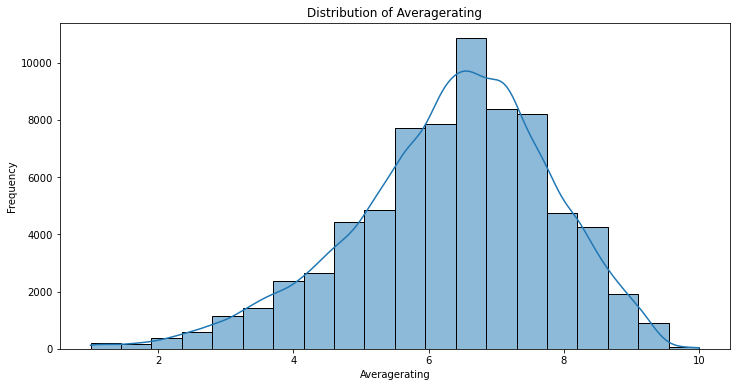

In [96]:
plot_univariate_numerical(df, 'averagerating')

The distribution of movie ratings shows that most movies have ratings close to the average value. This indicates that a large number of movies tend to perform around the average rating.

However, there are some movies with notably low ratings, which is expected as not all movies perform well. Conversely, there are also movies with very high ratings, likely reflecting their popularity and high performance.

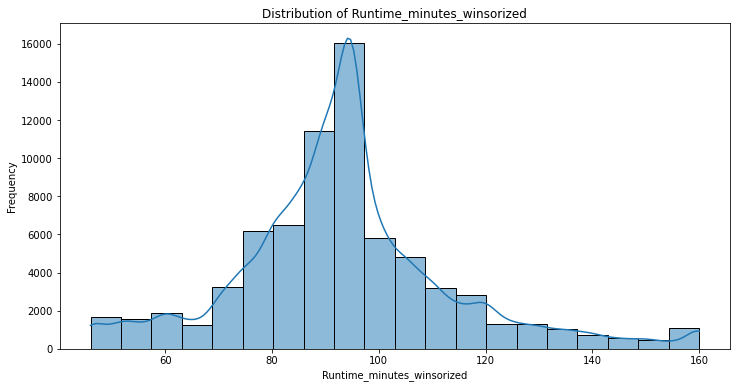

In [97]:
plot_univariate_numerical(df, 'runtime_minutes_winsorized')

The above plot indicates that there is a central tendency around a specific runtime duration, with most movies having durations clustered around this central value. The tapering tails on both sides of the curve suggest that fewer movies have short or long runtimes compared to the majority of movies in the dataset. This distribution pattern is typical for movie runtimes, where most films fall within a certain duration range.

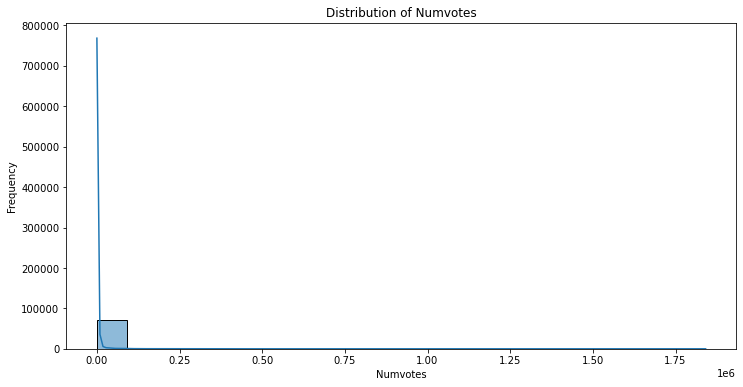

In [98]:
plot_univariate_numerical(df, 'numvotes')

The above plot shows that while a few movies are extremely popular and receive a very high number of votes, most movies tend to receive relatively few votes.

## VISUALIZATIONS ##

**STEP 3: BIVARIATE ANALYSIS**

We will plot:
1. The average rating against genre categories.
2. The average rating against number of votes
3. Runtime minutes against votes
4. Runtime minutes against average rating
5. Genre categories against runtime minutes

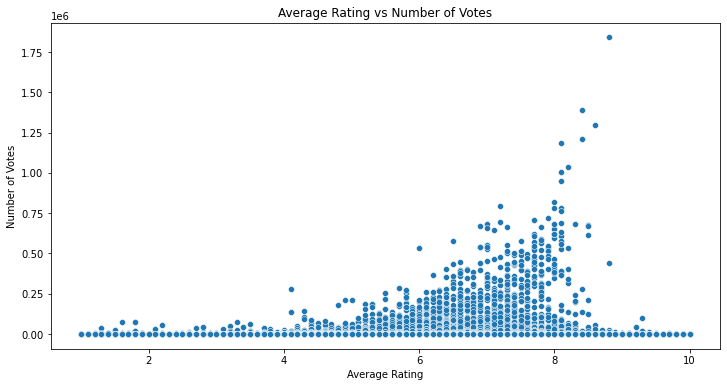

In [108]:
# Bivariate analysis of 'averagerating' vs 'numvotes'
plt.figure(figsize=(12, 6))
sns.scatterplot(data=df, x='averagerating', y='numvotes')
plt.title('Average Rating vs Number of Votes')
plt.xlabel('Average Rating')
plt.ylabel('Number of Votes')
plt.show()

In the plot above, we observe that the majority of votes fall within the 6 to 8 rating range. Additionally, the rating appears to be strongly influenced by the number of votes cast.

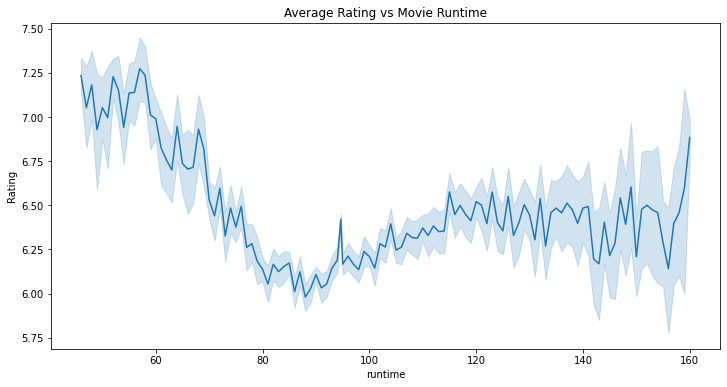

In [131]:
plt.figure(figsize=(12, 6))
sns.lineplot(data=df, x='runtime_minutes_winsorized', y='averagerating')
plt.title('Average Rating vs Movie Runtime')
plt.xlabel('runtime')
plt.ylabel('Rating')
plt.show()

From plot above, we observe that, movies with low runtime minutes have highter ratings. As the runtime increase, the number of rtaings go down as well.

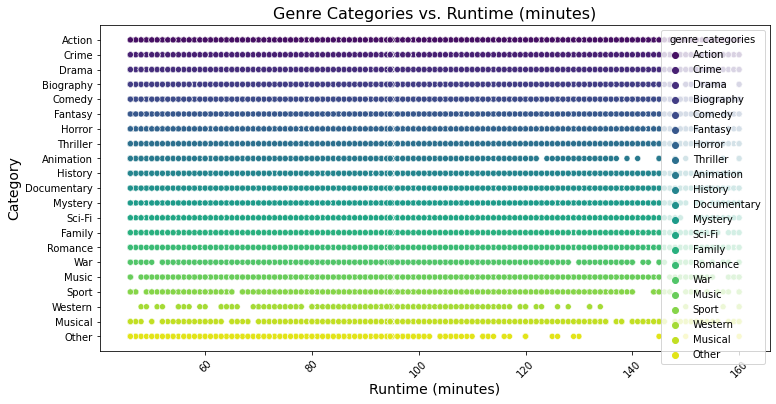

In [113]:
# Scatter plot for runtime_minutes
plt.figure(figsize=(12, 6))
sns.scatterplot(x='runtime_minutes_winsorized', y='genre_categories', data=exploded, hue='genre_categories', palette='viridis')
plt.title('Genre Categories vs. Runtime (minutes)', fontsize=16)
plt.xlabel('Runtime (minutes)', fontsize=14)
plt.ylabel('Category', fontsize=14)
plt.xticks(rotation=45)
plt.show()

Based on the plot above, it is evident that movies in genres such as action, crime, drama, biography, comedy, fantasy, horror, and thriller consistently exhibit longer runtimes. In contrast, other genres display a mix of both high and average runtimes.

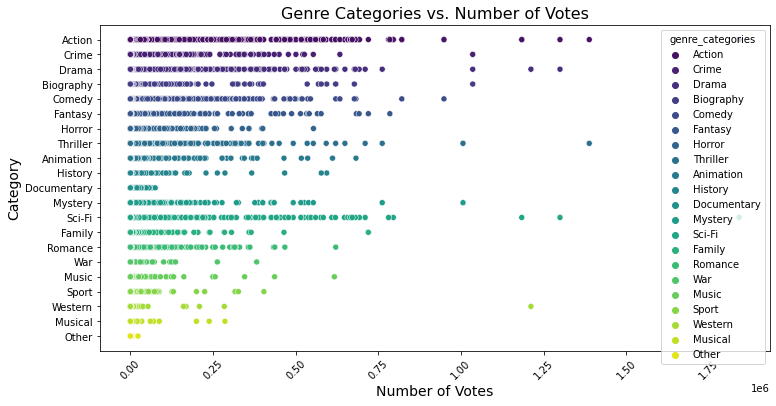

In [110]:
# Scatter plot for numvotes
plt.figure(figsize=(12, 6))
sns.scatterplot(x='numvotes', y='genre_categories', data=exploded, hue='genre_categories', palette='viridis')
plt.title('Genre Categories vs. Number of Votes', fontsize=16)
plt.xlabel('Number of Votes', fontsize=14)
plt.ylabel('Category', fontsize=14)
plt.xticks(rotation=45)
plt.show()



It is apparent from the plot above, that movies in genres such as action, crime, drama, thriller, sci-fi, and comedy receive a notably high number of votes. These genres appear to consistently attract votes compared to others

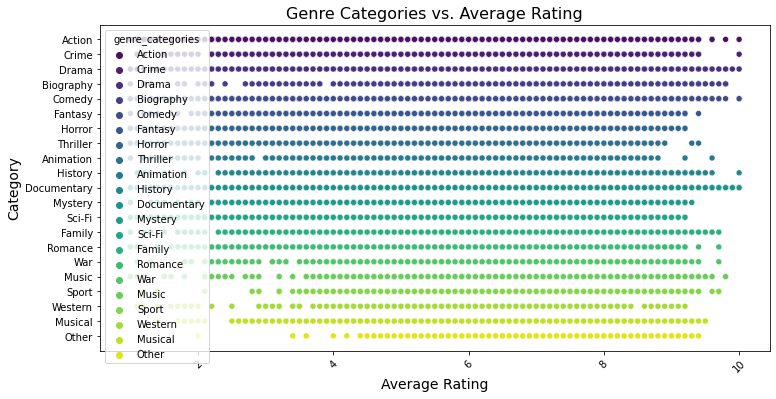

In [111]:
# Scatter plot for averagerating
plt.figure(figsize=(12, 6))
sns.scatterplot(x='averagerating', y='genre_categories', data=exploded, hue='genre_categories', palette='viridis')
plt.title('Genre Categories vs. Average Rating', fontsize=16)
plt.xlabel('Average Rating', fontsize=14)
plt.ylabel('Category', fontsize=14)
plt.xticks(rotation=45)
plt.show()

The drama genre, along with documentary, shows a consistency in ratings across a range from low to high. Action, crime, drama, comedy, documentary, and history have also received extremely high ratings of 10. Drama appears to garner a significant amount of attention.

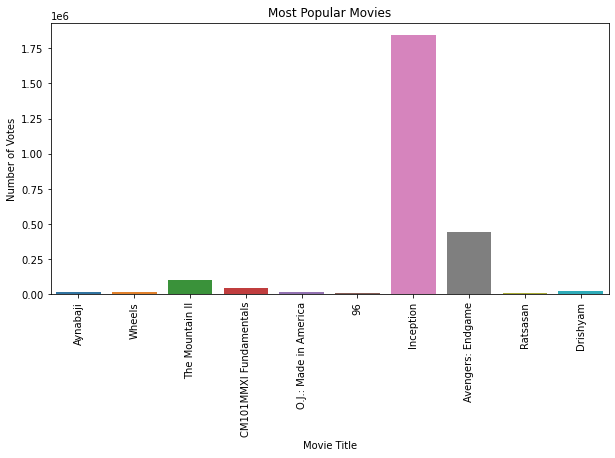

In [119]:
# Most popular movies
most_popular = df[df['numvotes'] > 10000].sort_values(by='averagerating', ascending=False).head(10)

# Visualize most popular movies
plt.figure(figsize=(10, 5))
sns.barplot(data=most_popular, x='primary_title', y='numvotes')
plt.title('Most Popular Movies')
plt.xlabel('Movie Title')
plt.ylabel('Number of Votes')
plt.xticks(rotation=90)
plt.show()

In [120]:
rows_with_specific_title = df[df['primary_title'] == 'Inception']

# Display the rows
print(rows_with_specific_title)

       movie_id primary_title original_title  start_year  runtime_minutes  \
2387  tt1375666     Inception      Inception        2010            148.0   

                       genres  averagerating  numvotes  \
2387  Action,Adventure,Sci-Fi            8.8   1841066   

      runtime_minutes_winsorized          genre_categories  
2387                       148.0  [Action, Action, Sci-Fi]  


The movie with the highest number of votes is 'Inception'. This film falls into the action genre category, with elements of sci-fi. Both genres have previously demonstrated high ratings and received numerous votes. The combination of these genres in one movie has resulted in a film with high votes and an average rating of 8.8, which is also relatively high.

**STEP 3 : MULTIVARIENT ANALYSIS**

<Figure size 720x576 with 0 Axes>

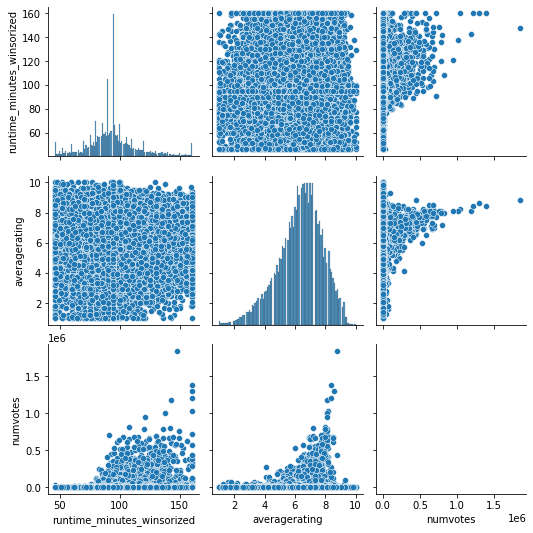

In [121]:
# Multivariate Analysis
plt.figure(figsize=(10, 8))
sns.pairplot(df[['runtime_minutes_winsorized', 'averagerating', 'numvotes']])
plt.show()

## RECOMMEDATIONS ##

Based on the analysis and findings, here are some recommendations for Microsoft's new movie studio:

**Focus on Action, Drama, and Sci-Fi Genres:** The analysis revealed that movies in the action, drama, and sci-fi genres tend to receive higher ratings and more votes, indicating their popularity among audiences. Microsoft should consider producing films in these genres or combining elements from these genres to increase their chances of success.

**Maintain a Balanced Runtime:** The analysis showed that movies with shorter runtimes tend to receive higher ratings and more votes. However, it's essential to strike a balance and not compromise the storytelling or character development. A runtime between 90 and 120 minutes could be an ideal range to aim for, as it allows for a compelling narrative without becoming too lengthy.

**Experiment with Genre Combinations:** The highly successful movie "Inception" demonstrated the potential of combining genres like action and sci-fi. Microsoft should explore innovative genre combinations that can captivate audiences and offer unique experiences. This approach can help their films stand out in a crowded market.

**Leverage Existing Intellectual Properties:** While the analysis focused on existing movies, Microsoft could also consider adapting popular novels, video games, or other intellectual properties with established fan bases. This strategy can provide a built-in audience and increase the chances of success for their films.
Invest in Marketing and Promotion: While the analysis focused primarily on the attributes of successful movies, effective marketing and promotion campaigns are also crucial for driving audience awareness and interest. Microsoft should allocate appropriate resources for marketing and promotion to ensure their films reach their target audiences effectively.

## CONCLUSION ##

Through the above data analysis, we have gained valuable insights into the dynamics of the movie industry and the characteristics of successful films. By analyzing factors such as genres, runtime, ratings, and popularity, we have identified trends and patterns that can guide Microsoft's entry into the movie production business.
The analysis revealed that genres like action, drama, and sci-fi tend to resonate well with audiences, receiving higher ratings and more votes. Additionally, movies with shorter runtimes and innovative genre combinations have the potential to captivate viewers and achieve success at the box office.
By implementing the recommendations outlined in this analysis, Microsoft can increase their chances of producing films that appeal to a wide audience and perform well financially. However, it is important to note that the movie industry is constantly evolving, and these recommendations should be complemented by ongoing market research and adaptability to changing audience preferences.
Overall, this project has provided a solid foundation for Microsoft's entry into the movie industry, equipping them with data-driven insights to make informed decisions and position themselves competitively in this dynamic and creative market.